In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

pad = "/Users/hbraakmann/Desktop/QGIS_DATA/Monitoring_Broedvogels/trends_watervogels_2022-2023.xlsx"
df_watervogels = pd.read_excel(pad,sheet_name="seizoensgetallen provincies", skiprows=2)

soorten_watervogels = ["Grutto", "Tureluur", "Slobeend", "Kluut"]
zeeland_b = df_watervogels.loc[(df_watervogels["Soort"].isin(soorten_watervogels)) & (df_watervogels["Provincie"] == "Zeeland")]
zeeland_b.columns = zeeland_b.columns.astype(str)


df_zeeland = zeeland_b[["Soort"] + [str(y) for y in range(1975,2023)] + ["verandering vanaf 2011"]].reset_index(drop=True)
df_zeeland

,Soort,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,verandering vanaf 2011
0,Slobeend,1544.42939,1113.430038,1250.581699,1494.290258,1408.931811,621.402135,919.081130,1196.617086,750.503865,...,1195.691504,1594.122007,1655.554574,1469.346047,1608.918958,1624.061459,2182.644299,1909.249926,2329.952013,7.2
1,Kluut,992.83647,1025.666675,789.309368,1025.281376,1258.550205,1210.602574,1253.118520,1217.594443,987.138544,...,1175.839760,1460.002561,1516.756970,1508.958362,1416.815485,1283.181869,1317.306784,1586.767750,1529.662788,0.9
2,Grutto,65.49970,59.453582,62.694832,43.718983,77.688906,108.539191,83.164668,127.905464,200.014101,...,330.740743,348.002862,310.150600,374.157586,358.393514,284.293392,309.857142,394.972469,472.364074,1
3,Tureluur,4351.99563,4521.326602,4480.469412,5520.160491,4554.198671,3822.347895,3796.665836,3431.677322,3186.761890,...,2429.535580,2242.716292,2716.190093,2803.343684,3001.063721,3089.063363,2841.221111,3002.973332,2992.618850,1.1


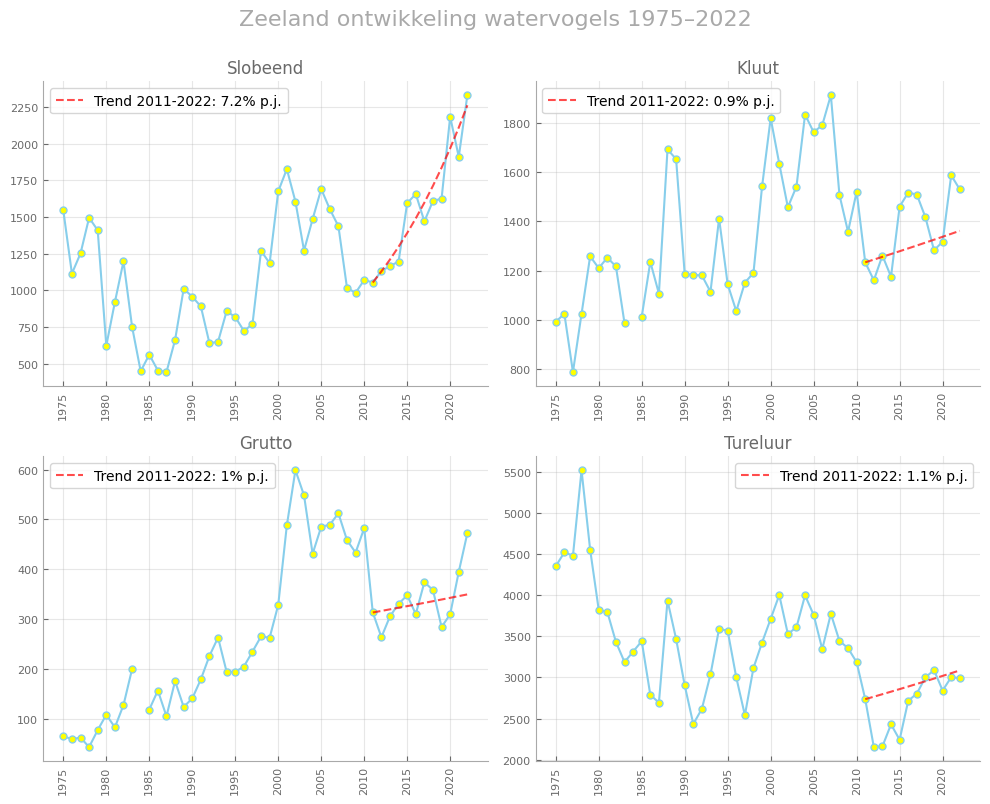

In [2]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

birds = df_zeeland['Soort'].unique()

for i, bird in enumerate(birds):
    ax = axes[i//2, i%2]
    bird_data = df_zeeland[df_zeeland['Soort'] == bird]
    years = bird_data.columns[1:-1]
    values = bird_data.iloc[0, 1:-1]
    
    base_value = values.iloc[-12]  # 12 jaar
    trend = bird_data.iloc[0, -1]
    trend_line = [base_value * (1 + trend/100) ** i for i in range(12)]
    
    ax.plot(years, values, color="skyblue", marker="o", markersize=5, mfc="yellow")
    ax.plot(years[-12:], trend_line, color="red", linestyle="--", alpha=0.7, label=f"Trend 2011-2022: {trend}% p.j.")
    ax.tick_params(axis="x", rotation=90, labelsize=8, colors="dimgrey", direction="in")
    ax.tick_params(axis="y", labelsize=8, colors="dimgrey", direction="in")
    ax.set_xticks(years[::5])
    ax.grid(axis="both", alpha=0.3) 
    ax.set_title(bird, color="dimgrey")
    ax.spines[["top","right"]].set_visible(False)
    ax.spines[["left","bottom"]].set_color("darkgrey")
    ax.legend()

fig.suptitle("Zeeland ontwikkeling watervogels 1975–2022", color="darkgrey", fontsize=16, y=1)
plt.tight_layout()
plt.show()

In [56]:
(1//2,0%2)

(0, 1)

In [3]:
df_zeeland[["Soort", "2011"]]

,Soort,2011
0,Slobeend,1052.413191
1,Kluut,1234.047604
2,Grutto,313.467868
3,Tureluur,2735.904599
